In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

save = True

from collections import namedtuple
import camb

In [2]:
PowerSpectrum = namedtuple('PowerSpectrum',
                           field_names=['name', 'ell_min', 'ell_max', 'bandpower', 'error_lower', 'error_upper'])

# Load data

In [3]:
with open('actpol_fullspectra/README_fullspectra') as f:
    print(f.read())

The ACTPol EE, TT and TE power spectra are released here with their corresponding window functions and simulated covariance matrix. We also include the BB spectra in two wide bins. In addition we release the EE and TT N_l curves for the various patches. The effective noise power spectrum consist of the noise power spectrum divided by the beam window function.

The Cl spectra are binned, and are given with the following columns:
-the mean multipole moment l
-the power spectrum in units of \mu K^2 C_l
-the error for the binned value in units of \mu K^2 C_l

These are the data shown in Figure 10. of Louis et al.

For statistical comparison to a theory Cl, the theory Cls should be convolved with bandpower window functions.  Any likelihood analysis should be performed using the corresponding CMB-only likelihood provided.

The combined CMB-only bandpowers (marginalised over astrophysical foregrounds) are given in the cmbonly tarball.

The ACTPol EE and TT noise curves are given as:

- multip

In [4]:
actpol_ell_center, actpol_C_BB, actpol_C_BB_error = np.loadtxt('actpol_fullspectra/spectrum_BB_widebins.dat',
                                                               unpack=True)
actpol_D_BB = actpol_ell_center * (actpol_ell_center + 1) / (2 * np.pi) * actpol_C_BB
actpol_D_BB_error = actpol_ell_center * (actpol_ell_center + 1) / (2 * np.pi) * actpol_C_BB_error
actpol2017 = PowerSpectrum("ACTPol", actpol_ell_center, actpol_ell_center, actpol_D_BB, actpol_D_BB_error, actpol_D_BB_error)

In [5]:
# BICEP2/Keck Array January 2015 Data Products
# The Keck Array and BICEP2 Collaborations, BK-V: Measurements of B-mode Polarization at Degree Angular Scales and 150 GHz by Keck Array
# http://bicepkeck.org/
#
# File: BK_bandpowers_20150130.txt 
# Date: 2015-01-30
# 
# BICEP2/Keck Array combined bandpowers 
# This text file contains the BICEP2/Keck Array combined TT, TE, EE, BB, TB, and EB bandpowers [ell*(ell+1)*C_{ell}/(2*pi)] and uncertainties. 
# They correspond to Figure 9 of BK-V and the left column of Figure 2 of A Joint Analysis of BICEP2/Keck Array and Planck Data.
# Uncertainties are statistical only, the standard deviation of the constrained lensed-Î›CDM+noise simulations. 
# Uncertainties are calculated as the square root of diagonal elements of the bandpower covariance matrix. 
# The nature of the simulations constrains T to match the observed sky. Thus TT, TE, and TB uncertainties do not include appropriate sample variance.
# Sample variance for a tensor BB signal is not included either.
# The calibration procedure uses TB and EB to constrain the polarization angle. Thus TB and EB cannot be used to measure astrophysical polarization rotation.
# The units are uK^2. 
# 
# Columns: lmin, lcenter, lmax, TT, TE, EE, BB, TB, EB, dTT, dTE, dEE, dBB, dTB, dEB 
lmin, lcenter, lmax, BB, dBB = np.loadtxt('BK_bandpowers_20150130.txt', usecols=(0, 1, 2, 6, 12), unpack=True, skiprows=14)  #, encoding=None)

In [6]:
# BICEP2/Keck Array October 2015 Data Products
# BICEP2/Keck Array VI: Improved Constraints On Cosmology and Foregrounds When Adding 95 GHz Data From Keck Array
# http://bicepkeck.org/
#
# File: BK14_bandpowers_20151030.txt
# Date: 2015-10-30
#
# This file contains BB bandpowers from the BK14 analysis: a total of 11 auto and 55 cross spectra between 
# BICEP2/Keck maps at 95 and 150 GHz, WMAP maps at 23 and 33 GHz, and Planck maps at 30, 44, 70, 100, 143, 
# 217, and 353 GHz. These correspond to the points shown in Figure 14 of BK-VI (except bandpowers 1-9 are 
# included here). The error bars are standard deviations of lensed-LCDM+noise simulations and hence contain 
# no sample variance on any additional signal component. 
#
# Bandpowers are specified as ell*(ell+1)*C_{ell}/(2*pi) in units of uK_{CMB}^2.
#
# Column 1: bin number
# Column 2: ell
# Columns 3-134: BB bandpower and error bar with the following order for the spectra:
#                BK_{95}xBK_{95} BK_{150}xBK_{150} W_{23}xW_{23} P_{30}xP_{30} W_{33}xW_{33} P_{44}xP_{44}
#                P_{70}xP_{70} P_{100}xP_{100} P_{143}xP_{143} P_{217}xP_{217} P_{353}xP_{353} BK_{95}xBK_{150}
#                BK_{95}xW_{23} BK_{95}xP_{30} BK_{95}xW_{33} BK_{95}xP_{44} BK_{95}xP_{70} BK_{95}xP_{100}
#                BK_{95}xP_{143} BK_{95}xP_{217} BK_{95}xP_{353} BK_{150}xW_{23} BK_{150}xP_{30} BK_{150}xW_{33}
#                BK_{150}xP_{44} BK_{150}xP_{70} BK_{150}xP_{100} BK_{150}xP_{143} BK_{150}xP_{217} BK_{150}xP_{353}
#                W_{23}xP_{30} W_{23}xW_{33} W_{23}xP_{44} W_{23}xP_{70} W_{23}xP_{100} W_{23}xP_{143}
#                W_{23}xP_{217} W_{23}xP_{353} P_{30}xW_{33} P_{30}xP_{44} P_{30}xP_{70} P_{30}xP_{100}
#                P_{30}xP_{143} P_{30}xP_{217} P_{30}xP_{353} W_{33}xP_{44} W_{33}xP_{70} W_{33}xP_{100}
#                W_{33}xP_{143} W_{33}xP_{217} W_{33}xP_{353} P_{44}xP_{70} P_{44}xP_{100} P_{44}xP_{143}
#                P_{44}xP_{217} P_{44}xP_{353} P_{70}xP_{100} P_{70}xP_{143} P_{70}xP_{217} P_{70}xP_{353}
#                P_{100}xP_{143} P_{100}xP_{217} P_{100}xP_{353} P_{143}xP_{217} P_{143}xP_{353} P_{217}xP_{353}
# For example, column 3 is the BK_95 x BK14_95 bandpower, column 4 is the error bar for that bandpower, 
# column 5 is the BK_150 x BK_150 bandpower, and so on.
#
ell, bk95, bk95_error = np.loadtxt('BK14_bandpowers_20151030.txt', usecols=(1, 2, 3), unpack=True)
bk150, bk150_error = np.loadtxt('BK14_bandpowers_20151030.txt', usecols=(4, 5), unpack=True)
# Since this file doesn't give bin edges, use the edges from the previous release (see below)
bk2015_95 = PowerSpectrum("BK 2015 95 GHz", lmin, lmax, bk95, bk95_error, bk95_error)
bk2015_150 = PowerSpectrum("BK 2015 150 GHz", lmin, lmax, bk150, bk150_error, bk150_error)

In [7]:
# The early 2015 bin centers are close to the late 2015 centers
lcenter - ell

array([ -1.3,   0.6,   1.9,   3.4,   5.3,   8.2,  11. ,  12.6,  14. ])

In [8]:
# BICEP2/Keck Array October 2018 Data Products
# BICEP2/Keck Array X: Constraints on Primordial Gravitational Waves using Planck, WMAP, and New BICEP2/Keck Observations through the 2015 Season
# http://bicepkeck.org/
#
# File: BK15_components_20180921.txt
# Date: 2018-09-21
#
# This file contains the per-ell bin spectral decomposition found in
# Figure 14 of BICEP2/Keck Array X. For the 150 GHz amplitude of CMB,
# dust, and synchrotron components, we provide the most probable value
# in each bin, as well as 68% and 95% credible intervals, all derived
# from 1D marginalized posteriors. We have additionally marginalized 
# over the spectral indices of the dust and synchrotron components, 
# as well as possible dust-sync spatial correlation. See BICEP2/Keck 
# Array X for more details.
#
# Points in this file should be used for display purposes only. 
# Component amplitudes in each ell bin are highly correlated and 
# correlations exist between ell bins as well.
#
# Columns: lmin, lcenter, lmax, CMB max, CMB 68% low, CMB 68% high,
#          CMB 95% low, CMB 95% high, dust max, dust 68% low, dust 68% high, 
#          dust 95% low, dust 95% high, sync max, sync 68% low, sync 68% high, 
#          sync 95% low, sync 95% high
bk18c = np.loadtxt('BK15_components_20180921.txt', usecols=(0, 1, 2, 3, 4, 5), unpack=True)
bk18c_lmin, bk18c_lcenter, bk18c_lmax, bk18cmb_150, bk18cmb_150_low, bk18cmb_150_high = bk18c
bk2018_150_cmb = PowerSpectrum("BK 2018 150 GHz", bk18c_lmin, bk18c_lmax, bk18cmb_150, bk18cmb_150_low, bk18cmb_150_high)

In [9]:
# BICEP2/Keck Array October 2018 Data Products
# BICEP2/Keck Array X: Constraints on Primordial Gravitational Waves using Planck, WMAP, and New BICEP2/Keck Observations through the 2015 Season
# http://bicepkeck.org/
#
# File: BK15_bandpowers_20180920.txt
# Date: 2018-09-20
#
# This file contains BB bandpowers from the BK15 analysis: a total of 12 auto and
# 66 cross spectra between BICEP2/Keck maps at 95, 150, and 220 GHz, WMAP maps at
# 23 and 33 GHz, and Planck maps at 30, 44, 70, 100, 143, 217, and 353 GHz.
#
# Bandpowers are specified as ell*(ell+1)*C_{ell}/(2*pi) in units of uK_{CMB}^2.
# These are the same data as shown in Figure 13 of BK-X, except that figure uses
# 100*ell*C_ell/(2*pi). The error bars include sample variance corresponding to the 
# maximum likelihood lensed-LCDM+r+dust+synchrotron model, as in Figure 13.
#
# Column 1: bin number
# Column 2: ell
# Columns 3-158: BB bandpower and error bar with the following order for the spectra:
#                BK_{95}xBK_{95} BK_{150}xBK_{150} BK_{220}xBK_{220} W_{23}xW_{23} P_{30}xP_{30} W_{33}xW_{33}
#                P_{44}xP_{44} P_{70}xP_{70} P_{100}xP_{100} P_{143}xP_{143} P_{217}xP_{217} P_{353}xP_{353}
#                BK_{95}xBK_{150} BK_{95}xBK_{220} BK_{95}xW_{23} BK_{95}xP_{30} BK_{95}xW_{33} BK_{95}xP_{44}
#                BK_{95}xP_{70} BK_{95}xP_{100} BK_{95}xP_{143} BK_{95}xP_{217} BK_{95}xP_{353} BK_{150}xBK_{220}
#                BK_{150}xW_{23} BK_{150}xP_{30} BK_{150}xW_{33} BK_{150}xP_{44} BK_{150}xP_{70} BK_{150}xP_{100}
#                BK_{150}xP_{143} BK_{150}xP_{217} BK_{150}xP_{353} BK_{220}xW_{23} BK_{220}xP_{30} BK_{220}xW_{33}
#                BK_{220}xP_{44} BK_{220}xP_{70} BK_{220}xP_{100} BK_{220}xP_{143} BK_{220}xP_{217} BK_{220}xP_{353}
#                W_{23}xP_{30} W_{23}xW_{33} W_{23}xP_{44} W_{23}xP_{70} W_{23}xP_{100} W_{23}xP_{143}
#                W_{23}xP_{217} W_{23}xP_{353} P_{30}xW_{33} P_{30}xP_{44} P_{30}xP_{70} P_{30}xP_{100}
#                P_{30}xP_{143} P_{30}xP_{217} P_{30}xP_{353} W_{33}xP_{44} W_{33}xP_{70} W_{33}xP_{100}
#                W_{33}xP_{143} W_{33}xP_{217} W_{33}xP_{353} P_{44}xP_{70} P_{44}xP_{100} P_{44}xP_{143}
#                P_{44}xP_{217} P_{44}xP_{353} P_{70}xP_{100} P_{70}xP_{143} P_{70}xP_{217} P_{70}xP_{353}
#                P_{100}xP_{143} P_{100}xP_{217} P_{100}xP_{353} P_{143}xP_{217} P_{143}xP_{353} P_{217}xP_{353}
# For example, column 3 is the BK15_95 x BK15_95 bandpower, column 4 is the error bar for that bandpower, 
# column 5 is the BK15_150 x BK15_150 bandpower, and so on.
#
_, bk18_150, bk18_150_error = np.loadtxt('BK15_bandpowers_20180920.txt', usecols=(1, 4, 5), unpack=True)
# Since this file doesn't give bin edges, use the edges from the previous release (see below)
bk2018_150 = PowerSpectrum("BK 2018 150 GHz", bk18c_lmin, bk18c_lmax, bk18_150, bk18_150_error, bk18_150_error)

In [10]:
# The 2018 bin centers are close to the late 2015 centers
lcenter - ell

array([ -1.3,   0.6,   1.9,   3.4,   5.3,   8.2,  11. ,  12.6,  14. ])

In [11]:
#    L    TT             TE             EE             BB             PP
(planck2015_ell_theory,
 planck2015_ee_theory) = np.loadtxt('COM_PowerSpect_CMB-base-plikHM-TT-lowTEB-minimum-theory_R2.02.txt',
                                    usecols=(0, 3), unpack=True)


#     ELL          D_ELL          ERRUP        ERRDOWN
#       I              E              E              E
#    none       muKcmb^2       muKcmb^2       muKcmb^2
planck2015_ee_low = PowerSpectrum("Planck 2015 EE low",
                                  *np.loadtxt('COM_PowerSpect_CMB-EE-loL-full_R2.02.txt',
                                         usecols=(0, 0, 1, 3, 2), skiprows=3, unpack=True))  # one l per bin

#            ELL     LMIN     LMAX          D_ELL            ERR
#              E        I        I              E              E
#                                        muKcmb^2       muKcmb^2
planck2015_ee_high = PowerSpectrum("Planck 2015 EE high",
                             *np.loadtxt('COM_PowerSpect_CMB-EE-hiL-binned_R2.02.txt',
                                         usecols=(1, 2, 3, 4, 4), skiprows=3, unpack=True))

# Combine
planck2015_ee = PowerSpectrum("Planck 2015 EE",
                              np.concatenate((planck2015_ee_low.ell_min - 0.5, planck2015_ee_high.ell_min)),
                              np.concatenate((planck2015_ee_low.ell_max + 0.5, planck2015_ee_high.ell_max)),
                              np.concatenate((planck2015_ee_low.bandpower, planck2015_ee_high.bandpower)),
                              np.concatenate((planck2015_ee_low.error_lower, planck2015_ee_high.error_lower)),
                              np.concatenate((planck2015_ee_low.error_upper, planck2015_ee_high.error_upper)))

In [12]:
negative_index = np.where(planck2015_ee_high.bandpower - planck2015_ee_high.error_upper < 0)[0].min()
planck2015_ee_clean = PowerSpectrum("Planck 2015 EE clean",
                                    planck2015_ee_high.ell_min[:negative_index],
                                    planck2015_ee_high.ell_max[:negative_index],
                                    planck2015_ee_high.bandpower[:negative_index],
                                    planck2015_ee_high.error_lower[:negative_index],
                                    planck2015_ee_high.error_upper[:negative_index])

In [13]:
# POLARBEAR-1 First Data Release
# The POLARBEAR Collaboration, A Measurement of the Cosmic Microwave Background B-Mode Polarization Power Spectrum at Sub-Degree Scales with POLARBEAR
#
# File: POLARBEAR_First_Data_Release_Bandpowers_2014-04-03.txt
# Date: 2014-04-03
# 
# POLARBEAR bandpowers 
# This text file contains the POLARBEAR BB bandpowers [ell*(ell+1)*C_{ell}/(2*pi)] and uncertainties. The units are uK^2. 
# They correspond to Figure 12 and Table 8 of the paper.
# Details on bandpower estimation and uncertainties are described in Sec.5.
#
# Columns: lmin lcenter lmax BB DeltaBB
pb2014 = PowerSpectrum("PB 2014",
                       *np.loadtxt('POLARBEAR_First_Data_Release_Bandpowers_2014-04-03.txt',
                                   usecols=[0, 2, 3, 4, 4], unpack=True))

In [14]:
#######################################################################
#SPTpol 100d BB bandpowers and bandpower errors.
#No calibration or beam uncertainties are included.
#
#Columns are (1) ell_center, (2) ell_min (3) ell_max 
#(4) 95x95 bandpower, (5) 95x95 error
#(6) 95x150 bandpower, (7) 95x150 error
#(8) 150x150 bandpower, (9) 150x150 error
#(10) inverse-variance-weighted combined bandpower
#(11) inverse-variance-weighted combined error
#
#All values are given in \ell_center * C_l with units of [10^{-3} uK^2]
#
#Generated 2015/02/24
#######################################################################
(ell_center, ell_min, ell_max,
 ell_C_ell_95, ell_C_ell_95_error, _, _,
 ell_C_ell_150, ell_C_ell_150_error,
 ell_C_ell_combined, ell_C_ell_combined_error) = np.loadtxt('bandpowers_sptpol_100deg2_BB.txt', unpack=True)
sptnorm = 1e-3 * (ell_center + 1) / (2 * np.pi)
spt2015 = PowerSpectrum("SPT 2015", ell_min, ell_max,
                        sptnorm * ell_C_ell_combined,
                        sptnorm * ell_C_ell_combined_error,
                        sptnorm * ell_C_ell_combined_error)

In [15]:
#bin; Lmin; Lmax; Lcenter; Power [uK2];  sigma;    x0;
Lmin, Lmax, Power_uK2, sigma, x0 = np.loadtxt('Polarbear_BB_2017.txt', usecols=(1, 2, 4, 5, 6), unpack=True)
Lmin[3] = 1700  # Fix typo
# To Do: calculate these from the values in the file
error_lower = np.array([0.026, 0.054, 0.109, 0.239])
error_upper = np.array([0.029, 0.057, 0.116, 0.260])
pb2017 = PowerSpectrum("PB 2017", Lmin, Lmax, Power_uK2, error_lower, error_upper)

# CAMB

In [16]:
#
tau = 0.078
billion_As_expm2tau = 1.881
As = billion_As_expm2tau * 1e-9 * np.exp(2 * tau)
print("A_s: {:.3g}".format(As))
cosmology = dict(H0=None,  # 67.0
                 cosmomc_theta=1.04086 / 100,  # None
                 ombh2=0.02222,
                 omch2=0.1197,
                 omk=0.0,
                 neutrino_hierarchy='degenerate',
                 num_massive_neutrinos=1,
                 mnu=0.06,
                 nnu=3.046,
                 YHe=None,
                 meffsterile=0.0,
                 standard_neutrino_neff=3.046,
                 TCMB=2.7255,
                 tau=tau,  # None,
                 deltazrei=None,
                 bbn_predictor=None,
                 theta_H0_range=[10, 100])
initial = dict(As=As,
               ns=0.9655,  # 0.96,
               nrun=0,
               nrunrun=0.0,
               r=0.0,
               nt=None,
               ntrun=0.0,
               pivot_scalar=0.05,
               pivot_tensor=0.05,
               parameterization=2)

A_s: 2.2e-09


In [17]:
ell_max = 2500
params = camb.CAMBparams()
params.set_cosmology(**cosmology)
params.WantTensors = True
params.InitPower.set_params(**initial)
params.set_for_lmax(ell_max, lens_potential_accuracy=10);
%time results = camb.get_results(params)
%time powers = results.get_cmb_power_spectra(params=params, lmax=ell_max, CMB_unit='muK', raw_cl=True)
C_EE = powers['lensed_scalar'][:, 1]
C_BB = powers['lensed_scalar'][:, 2]

CPU times: user 19.2 s, sys: 329 ms, total: 19.6 s
Wall time: 6.19 s
CPU times: user 16.3 s, sys: 83.1 ms, total: 16.3 s
Wall time: 5.17 s


In [18]:
# Now calculate the B-mode power spectrum with a nonzero tensor-to-scalar ratio r
r_large = 0.1
r_small = 0.01
initial['r'] = r_small
inflation_params = camb.initialpower.InitialPowerLaw()
inflation_params.set_params(**initial)
results.power_spectra_from_transfer(inflation_params)
C_EE_small, C_BB_small = results.get_total_cls(ell_max, CMB_unit='muK', raw_cl=True)[:, 1:3].T
initial['r'] = r_large
inflation_params.set_params(**initial)
results.power_spectra_from_transfer(inflation_params)
C_EE_large, C_BB_large = results.get_total_cls(ell_max, CMB_unit='muK', raw_cl=True)[:, 1:3].T

In [19]:
ell = np.arange(ell_max + 1)
C_to_D = ell * (ell + 1) / (2 * np.pi)
D_EE =  C_to_D * C_EE
D_BB = C_to_D * C_BB
D_EE_small = C_to_D * C_EE_small
D_BB_small = C_to_D * C_BB_small
D_EE_large = C_to_D * C_EE_large
D_BB_large = C_to_D * C_BB_large

[]

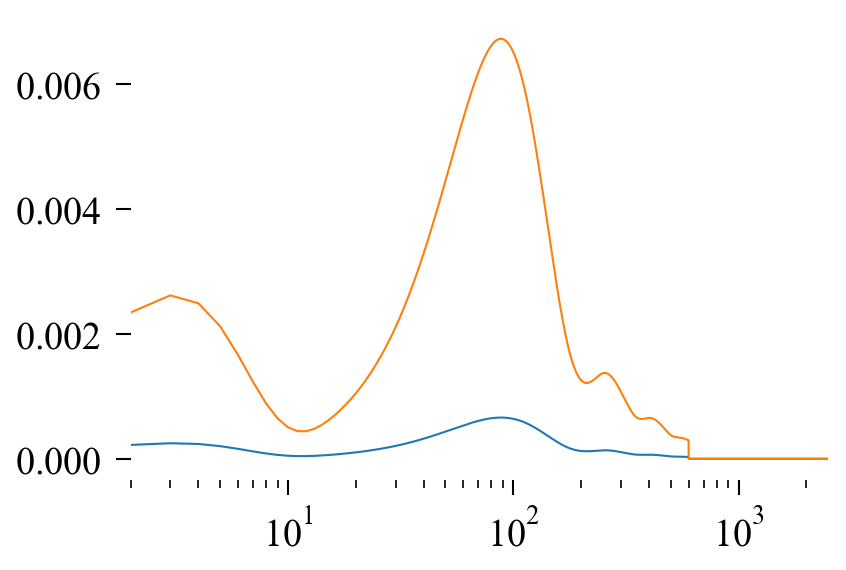

In [20]:
fig, ax = plt.subplots()
ax.plot(np.arange(D_BB.size), D_BB_small - D_BB)
ax.plot(np.arange(D_BB.size), D_BB_large - D_BB)
ax.set_xlim(2, ell_max)
ax.semilogx()

[]

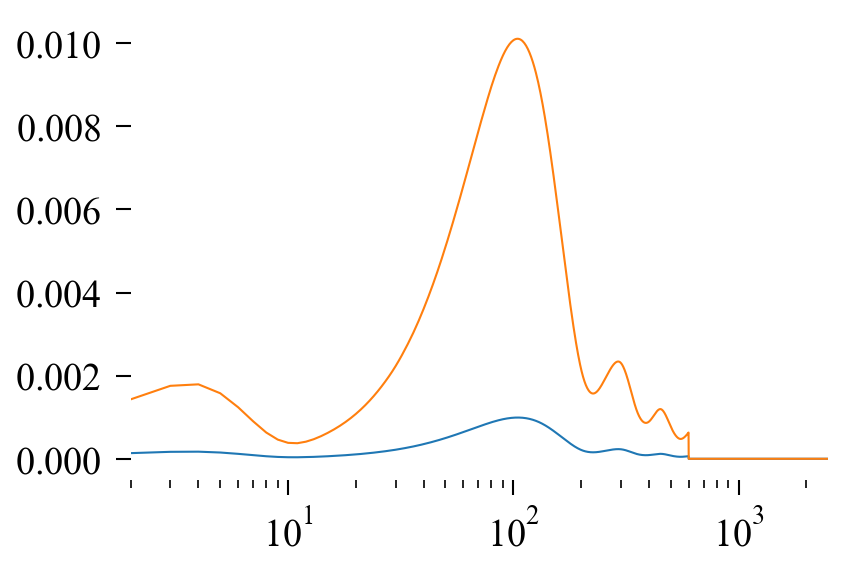

In [21]:
fig, ax = plt.subplots()
ax.plot(np.arange(D_EE.size), D_EE_small - D_EE)
ax.plot(np.arange(D_EE.size), D_EE_large - D_EE)
ax.set_xlim(2, ell_max)
ax.semilogx()

# Thesis plots

In [22]:
def plot_power_spectrum(ax, power_spectrum, **kwargs):
    if 'label' not in kwargs:
        kwargs.update({'label': power_spectrum.name})
    ax.errorbar((power_spectrum.ell_min + power_spectrum.ell_max) / 2,
                power_spectrum.bandpower,
                xerr=(power_spectrum.ell_max - power_spectrum.ell_min) / 2,
                yerr=(power_spectrum.error_lower, power_spectrum.error_upper),
                linestyle='none', **kwargs)

In [23]:
actpol_color = 'C0'
bk2015_95_color = 'purple'
bk2015_150_color = 'C1'
bk2018_150_color = 'C1'
planck2015_color = 'brown'
pb2014_color = 'orange'
pb2017_color = 'C2'
spt2015_color = 'C3'

(0.001, 1)

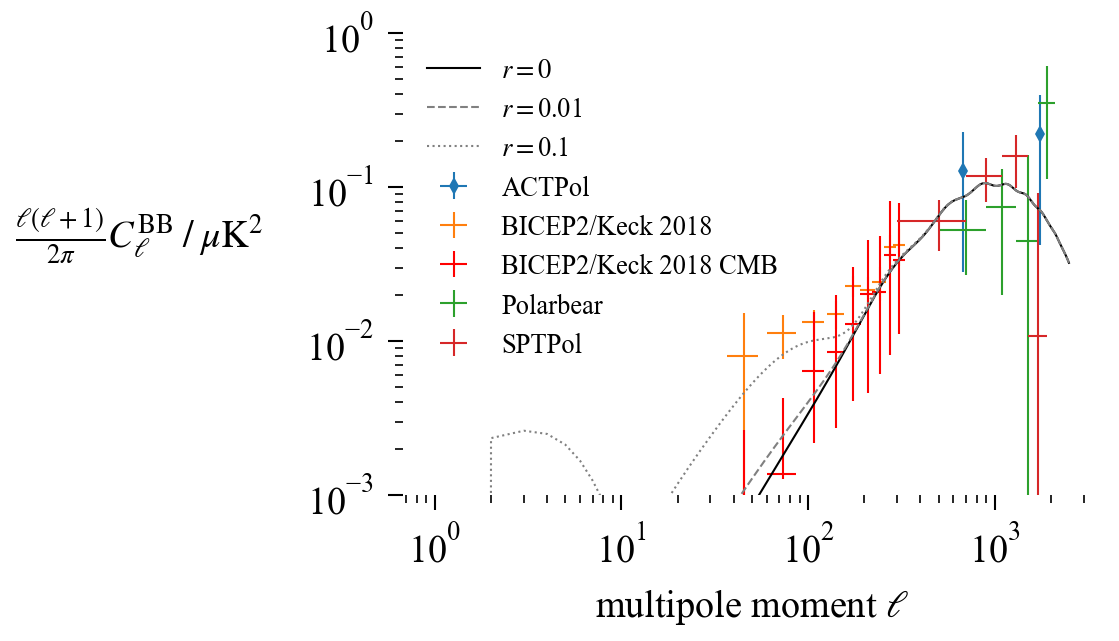

In [27]:
fig, ax = plt.subplots()

# Theory curves
ax.plot(ell, D_BB, color='black', linestyle='-', label='$r = 0$')
ax.plot(ell, D_BB_small, color='gray', linestyle='--', label='$r = $' + '{}'.format(r_small))
ax.plot(ell, D_BB_large, color='gray', linestyle=':', label='$r = $' + '{}'.format(r_large))


# Data points
plot_power_spectrum(ax, actpol2017, color=actpol_color, marker='d', label="ACTPol")
#plot_power_spectrum(ax, bk2015_95, color=bk2015_95_color)
#plot_power_spectrum(ax, bk2015_150, color=bk2015_150_color, label="BICEP2/Keck 2015")
plot_power_spectrum(ax, bk2018_150, color=bk2018_150_color, label="BICEP2/Keck 2018")
plot_power_spectrum(ax, bk2018_150_cmb, color='red', label="BICEP2/Keck 2018 CMB")

#plot_power_spectrum(ax, pb2014, 'blue')
plot_power_spectrum(ax, pb2017, color=pb2017_color, label="Polarbear")
plot_power_spectrum(ax, spt2015, color=spt2015_color, label="SPTPol")
ax.set_xlabel("multipole moment $\ell$")
ax.set_ylabel(r"$\frac{\ell (\ell + 1)}{2 \pi} C_{\ell}^\mathrm{BB} \; / \; \mu \mathrm{K}^2$",
              rotation='horizontal', labelpad=40)
ax.legend(loc='upper left', fontsize='xx-small');
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim(19, ell_max)
ax.set_ylim(0.001, 1)

#if save:
#    fig.savefig(thesis.full_filename(chapter, 'cmb_bb_power_spectrum.pdf'))

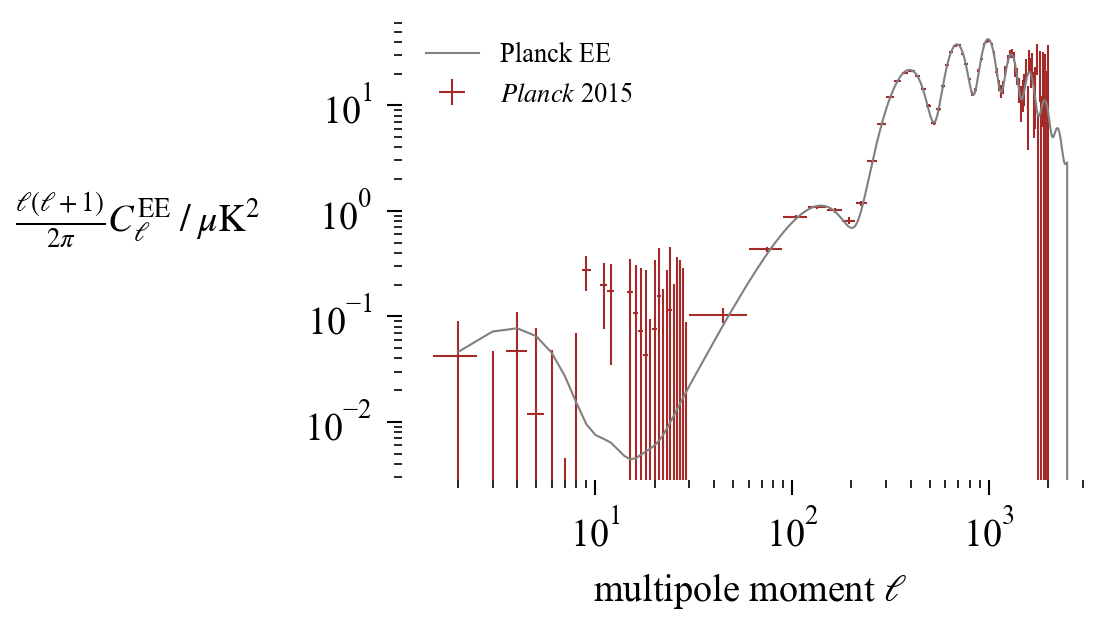

In [25]:
fig, ax = plt.subplots()

# Theory curves
#ax.plot(ell[2:], D_EE[2:], color='black', linestyle='-', label='CAMB EE')
ax.plot(planck2015_ell_theory, planck2015_ee_theory, color='gray', linestyle='-', label='Planck EE')

# Data points
plot_power_spectrum(ax, planck2015_ee, color=planck2015_color, label='$Planck$ 2015')

ax.set_xlabel("multipole moment $\ell$")
ax.set_ylabel(r"$\frac{\ell (\ell + 1)}{2 \pi} C_{\ell}^\mathrm{EE} \; / \; \mu \mathrm{K}^2$",
              rotation='horizontal', labelpad=40)
ax.legend(fontsize='xx-small')

ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim(19, ell_max)
#ax.set_ylim(0.001, 1)


In [30]:
bk2018_150_cmb

PowerSpectrum(name='BK 2018 150 GHz', ell_min=array([  37.,   60.,   93.,  126.,  158.,  190.,  221.,  254.,  286.]), ell_max=array([  54.,   86.,  121.,  156.,  192.,  227.,  262.,  297.,  332.]), bandpower=array([ 0.     ,  0.00138,  0.0064 ,  0.00844,  0.013  ,  0.0202 ,
        0.0209 ,  0.036  ,  0.0338 ]), error_lower=array([ 0.      ,  0.000105,  0.00422 ,  0.00571 ,  0.00894 ,  0.0156  ,
        0.0148  ,  0.0279  ,  0.0226  ]), error_upper=array([ 0.00263,  0.00289,  0.00898,  0.0114 ,  0.0173 ,  0.0253 ,
        0.0273 ,  0.0448 ,  0.0455 ]))

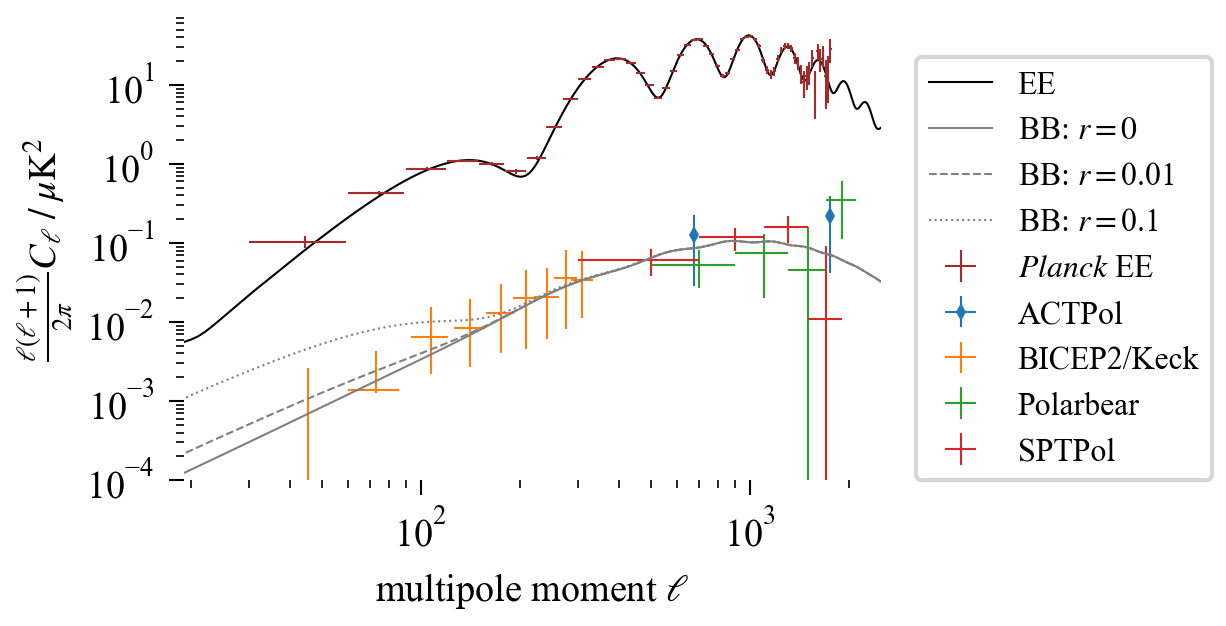

In [31]:
fig, ax = plt.subplots()

# Theory curves
ax.plot(ell, D_EE, color='black', linestyle='-', label='EE', zorder=0)
ax.plot(ell, D_BB, color='gray', linestyle='-', label='BB: $r = 0$')
ax.plot(ell, D_BB_small, color='gray', linestyle='--', label='BB: $r = $' + '{}'.format(r_small))
ax.plot(ell, D_BB_large, color='gray', linestyle=':', label='BB: $r = $' + '{}'.format(r_large))

# Data points
plot_power_spectrum(ax, planck2015_ee_clean, color=planck2015_color, label='$Planck$ EE')  #, alpha=1 zorder=0)
plot_power_spectrum(ax, actpol2017, color=actpol_color, marker='d', label="ACTPol")
#plot_power_spectrum(ax, bk2015_95, color=bk2015_95_color)
#plot_power_spectrum(ax, bk2015_150, color=bk2015_150_color, label="BICEP2/Keck")
#plot_power_spectrum(ax, bk2018_150, color=bk2018_150_color, label="BICEP2/Keck")
plot_power_spectrum(ax, bk2018_150_cmb, color=bk2018_150_color, label="BICEP2/Keck")
#plot_power_spectrum(ax, pb2014, 'blue')
plot_power_spectrum(ax, pb2017, color=pb2017_color, label="Polarbear")
plot_power_spectrum(ax, spt2015, color=spt2015_color, label="SPTPol")

ax.set_xlabel("multipole moment $\ell$")
ax.set_ylabel(r"$\frac{\ell (\ell + 1)}{2 \pi} C_{\ell} \; / \; \mu \mathrm{K}^2$",
              fontsize='small', rotation='vertical', labelpad=3)
ax.legend(loc=(1.05, 0), ncol=1, fontsize='x-small', frameon=True)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(19, ell_max)
ax.set_ylim(1e-4, 7e1)

if save:
    fig.savefig('cmb_polarization_power_spectrum.pdf')